# Least Squared fitting of a sinusoidal function, y = A  sin(2  pi  k  x + theta)

### with leastsq from scipy.optimize

In this section we want to estimate with "least squared", 
the parameters, A, k and theta 
of function 
y  = A * sin(2 * pi * k * x + theta)

In [1]:
import numpy as np
#from scipy.optimize import minimize
from numpy import arange, sin, pi, random, array
from scipy.optimize import leastsq

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058]
33.333333333333336
0.5235987755982988


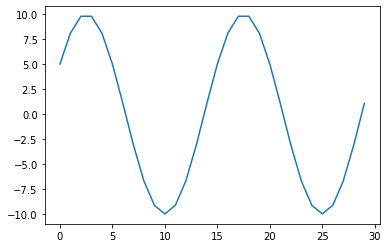

In [3]:
x = arange(0, 6e-2, 6e-2 / 30)
print (x)
A, k, theta = 10, 1.0 / 3e-2, pi / 6
print (k)
print (theta)

y_true = A * sin(2 * pi * k * x + theta)
y_meas = y_true + 2*random.randn(len(x))

plt.plot(y_true)
plt.show()

In [4]:
def residuals(p, y, x):
    A, k, theta = p
    err = y - A * sin(2 * pi * k * x + theta)
    return err

def peval(x, p):
    return p[0] * sin(2 * pi * p[1] * x + p[2])

In [5]:
p0 = [8, 1 / 2.3e-2, pi / 3]
print(array(p0))

[ 8.         43.47826087  1.04719755]


In [6]:
plsq = leastsq(residuals, p0, args=(y_meas, x))
print(plsq[0])
print(array([A, k, theta]))

[-9.54992783 33.76444839  3.5476493 ]
[10.         33.33333333  0.52359878]


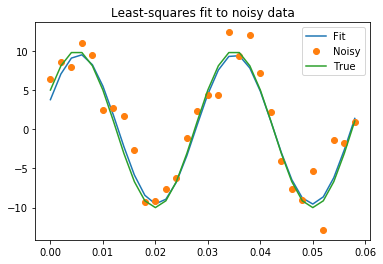

In [7]:
plt.plot(x, peval(x, plsq[0]),x,y_meas,'o',x,y_true)
plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show()